# 🧠 Subfield Classifier – Information Systems (IS)

This notebook sets up subfield classification for **IS abstracts** using the full 105-abstract dataset. It follows the same structure as the CS subfield pipeline, focusing on feature extraction, model training, evaluation, and saving.

### 💻 Step 1: Load and Filter IS Abstracts

We begin by loading the full dataset containing subfield labels and filtering it to include only **Information Systems (IS)** abstracts. This subset will be used for subfield-level classification in the IS discipline.

In [5]:
import pandas as pd

# Load the full subfield dataset
df = pd.read_csv("NLP_Abstract_Dataset (Subfield)(105).csv")

# Filter only Information Systems (IS) records
is_df = df[df["Discipline"] == "IS"].copy()

# Preview the first few rows
is_df.head()

ID Discipline Subfield                                           Abstract
5   6         IS      ENT  Enterprise Resource Planning (ERP) systems pro...
6   7         IS      IMP  This research makes an attempt to understand v...
7   8         IS      GOV  Electronic learning (e-learning) has been wide...
8   9         IS      ENT  The success rate of enterprise resource planni...
9  10         IS      GOV  Mobile-based advisory services have significan...

### 🧠 Step 2: Preprocessing – TF-IDF + Subfield Label Encoding

We convert the IS abstracts into numerical representations using **TF-IDF vectorization**, which captures the importance of words in each document relative to the corpus.  
We also encode the subfield labels into integers using **LabelEncoder**, preparing them for model training.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Extract features and labels
X = is_df['Abstract']
y = is_df['Subfield']

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Encode subfield labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Confirm transformation
print("TF-IDF matrix shape:", X_tfidf.shape)
print("Encoded subfield labels:", list(label_encoder.classes_))

TF-IDF matrix shape: (35, 1650)
Encoded subfield labels: ['BSP', 'DSA', 'ENT', 'GOV', 'IMP']


### 🤖 Step 3: Train-Test Split and Model Training (Logistic Regression)

We split the IS data using a **stratified 70/30 train-test split** to maintain subfield distribution in both sets.  
We then train a **Logistic Regression** classifier using the TF-IDF features and encoded subfield labels.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Train Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Confirm model is trained
print("Model training complete.")

Model training complete.


### 📊 Step 4: Model Evaluation – Classification Report & Confusion Matrix

We evaluate the model using standard classification metrics including precision, recall, and F1-score.  
We also generate a confusion matrix heatmap to visualize misclassifications across the five IS subfields.

📄 Classification Report:

              precision    recall  f1-score   support

         BSP       1.00      0.50      0.67         2
         DSA       0.00      0.00      0.00         2
         ENT       0.33      1.00      0.50         3
         GOV       0.00      0.00      0.00         2
         IMP       0.00      0.00      0.00         2

    accuracy                           0.36        11
   macro avg       0.27      0.30      0.23        11
weighted avg       0.27      0.36      0.26        11



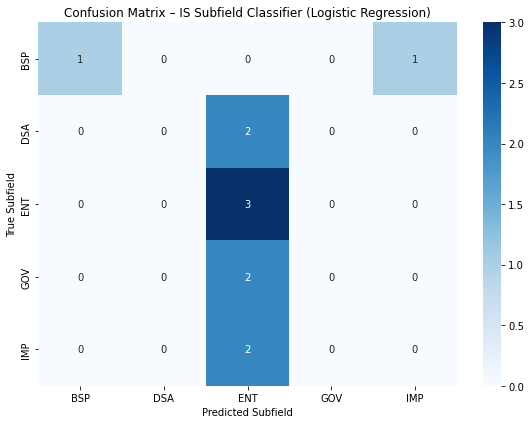

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = logreg_model.predict(X_test)

# Print classification report
print("📄 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Subfield')
plt.ylabel('True Subfield')
plt.title('Confusion Matrix – IS Subfield Classifier (Logistic Regression)')
plt.tight_layout()
plt.show()

### 📊 Confusion Matrix Interpretation – IS Subfield Classifier

The confusion matrix shows how the Logistic Regression model performed on the IS subfields using a 70/30 stratified train-test split.

- **ENT (Enterprise Systems & Platforms)** is the most confidently predicted class.
- Subfields like **DSA**, **GOV**, and **IMP** are consistently misclassified — often as **ENT**.
- This is likely due to overlapping terminology in enterprise-related abstracts, and the **small dataset size** (35 abstracts total), which limits generalization.

While performance is limited, this confirms that the full pipeline is functioning correctly and sets the stage for future refinement with more data.

### 🧾 Step 5: Save Final Model and TF-IDF Vectorizer

We save both the trained Logistic Regression model and the TF-IDF vectorizer to disk using `joblib`.  
This allows for consistent reuse or deployment without needing to retrain the model.

In [9]:
import joblib

# Save the trained model and vectorizer
joblib.dump(logreg_model, "subfield_classifier_logreg_is.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer_is.pkl")

print("✅ Model and vectorizer saved successfully.")

✅ Model and vectorizer saved successfully.


## ✅ Final Notes

This notebook completes the subfield classification pipeline for **Information Systems (IS)** abstracts using Logistic Regression.  
The pipeline includes TF-IDF vectorization, stratified 70/30 train-test split, model training, evaluation, and visualization.  

Although performance is limited by the dataset size (35 abstracts), the model and vectorizer were successfully saved, and the notebook confirms the pipeline works end-to-end.  
This structure will now be replicated for the IT discipline to complete the full subfield classification suite.